# Hierarchical Clustering Panel of Economists
## Author: Oliver Gladfelter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [4]:
data = pd.read_csv("output-data/answersAsColumns.csv")

data = data[data['name']!='Amy Finkelstein'] # too many no opinion / did not answers
data = data[data['name']!='Raj Chetty'] # too many no opinion / did not answers
data = data.reset_index()
del data['index']

data = data.replace({'Strongly Agree': 1, 'Agree': 1, 'Uncertain': 2, 'Disagree': 3, 'Strongly Disagree': 3, 'Did Not Answer': 0, 'No Opinion': 4})
data = data.fillna(0)

data['questions_not_answered'] = (data == 0).astype(int).sum(axis=1) # count number of 0s in rows
data = data[data['questions_not_answered']<=52] # remove if there's a lot of missing values

data2 = data.iloc[:,1:]

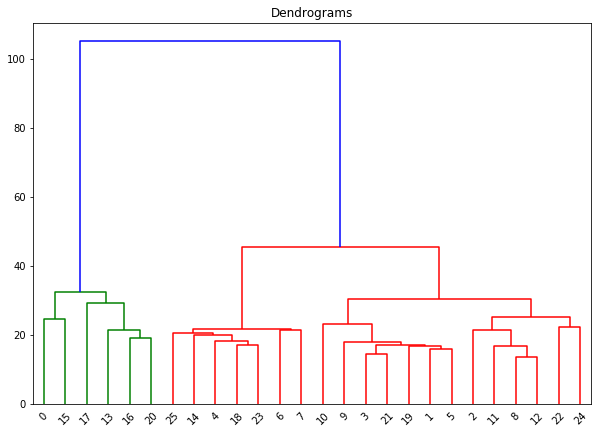

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data2, method='ward'))

In [8]:
# compute clusters
# number of clusters = 3, as determined using elbow method
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clusterArray = cluster.fit_predict(data2)

# add cluster assignments to data
data['clusterGroups'] = clusterArray

data = data.reset_index()
del data['index']

In [154]:
# validation testing:
# number of agrees, disagrees, etc should be even across clusters

uncertainList = []
agreeList = []
disagreeList = []
noOpinionList = []
didNotAnswerList = []

for row in range(0,len(data)):
    uncertains = 0
    agrees = 0
    disagrees = 0
    noOpinions = 0
    didNotAnswer = 0
    
    for column in data.columns[1:-2]:
        if data[column][row] == 0:
            didNotAnswer = didNotAnswer + 1
        elif data[column][row] == 4:
            noOpinions = noOpinions + 1
        elif data[column][row] == 1:
            agrees = agrees + 1
        elif data[column][row] == 2:
            uncertains = uncertains + 1
        elif data[column][row] == 3:
            disagrees = disagrees + 1
            
    noOpinionList.append(noOpinions)
    uncertainList.append(uncertains)
    agreeList.append(agrees)
    disagreeList.append(disagrees)
    
data['agreeCount'] = agreeList
data['uncertainCount'] = uncertainList
data['disagreeCount'] = disagreeList
data['noOpinionCount'] = noOpinionList
data['didNotAnswerCount'] = didNotAnswer

print("Agree")
print(data[data['clusterGroups']==0]['agreeCount'].mean())
print(data[data['clusterGroups']==1]['agreeCount'].mean())
print(data[data['clusterGroups']==2]['agreeCount'].mean())
print("")
print("Disgree")
print(data[data['clusterGroups']==0]['disagreeCount'].mean())
print(data[data['clusterGroups']==1]['disagreeCount'].mean())
print(data[data['clusterGroups']==2]['disagreeCount'].mean())
print("")
print("Uncertain")
print(data[data['clusterGroups']==0]['uncertainCount'].mean())
print(data[data['clusterGroups']==1]['uncertainCount'].mean())
print(data[data['clusterGroups']==2]['uncertainCount'].mean())
print("")
print("No Opinion")
print(data[data['clusterGroups']==0]['noOpinionCount'].mean())
print(data[data['clusterGroups']==1]['noOpinionCount'].mean())
print(data[data['clusterGroups']==2]['noOpinionCount'].mean())
print("")
print("Did not answer")
print(data[data['clusterGroups']==0]['didNotAnswerCount'].mean())
print(data[data['clusterGroups']==1]['didNotAnswerCount'].mean())
print(data[data['clusterGroups']==2]['didNotAnswerCount'].mean())

Agree
128.33333333333334
148.92307692307693
146.0

Disgree
43.333333333333336
53.92307692307692
56.0

Uncertain
40.5
52.46153846153846
43.0

No Opinion
19.0
14.076923076923077
10.857142857142858

Did not answer
18.0
18.0
18.0


In [158]:
del data['didNotAnswerCount']
del data['agreeCount']
del data['uncertainCount']
del data['disagreeCount']
del data['noOpinionCount']

import os
data.to_csv(os.getcwd() + "\\Documents\\hierarchyClusteringEconomists.csv",index=False)